In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from torch.profiler import profile, record_function, ProfilerActivity
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

class CustomDataLoader:
    def __init__(self, features, labels, batch_size=1, validation_size=0.0, shuffle=False):
        if validation_size > 0:
            train_data, val_data, train_labels, val_labels = train_test_split(
                features, labels, test_size=validation_size, random_state=42
            )
            self.train_loader = DataLoader(
                TensorDataset(torch.tensor(train_data).float(), torch.tensor(train_labels).float()),
                batch_size=batch_size,
                shuffle=shuffle,
            )
            self.val_loader = DataLoader(
                TensorDataset(torch.tensor(val_data).float(), torch.tensor(val_labels).float()), batch_size=batch_size, shuffle=shuffle
            )
        else:
            self.train_loader = DataLoader(
                TensorDataset(torch.tensor(features).float(), torch.tensor(labels).float()), batch_size=batch_size, shuffle=shuffle
            )
            self.val_loader = None

    def get_train_loader(self):
        return self.train_loader

    def get_val_loader(self):
        return self.val_loader

def evaluate_model(model, custom_train_loader, criterion, optimizer):
    num_epochs = 1200
    parameters = []
    image_folder = 'training_images'
    os.makedirs(image_folder, exist_ok=True)
    
#     num = 10000
#     x = np.linspace(-6, 6, num)
#     y = np.linspace(-0, 0, num)
#     random_feature1 = np.linspace(-0, 0, num)
#     random_feature2 = np.linspace(-0, 0, num)

#     inputs = np.stack([x], axis=1)
#     inputs_tensor = torch.from_numpy(inputs).float().to(device)

#     model.eval()
#     with torch.no_grad():
#         y_pred_model = model(inputs_tensor).cpu().numpy()

#     a = x
#     y_pred_manual = np.sin(a) + 2 * np.cos(a + 3 * np.sin(a)) + 3 * np.cos(a) ** 2 * np.sin(a) ** 2 + 0.5 * np.cos(a)

#     plt.figure(figsize=(10, 5))
#     plt.scatter(x, y_pred_model.flatten(), label='Model Output', s=1, alpha=0.1)
#     plt.scatter(x, y_pred_manual, label='Manual Calculation', s=1, alpha=0.1)
#     plt.xlabel('Input Feature 1')
#     plt.ylabel('Output')
#     plt.legend()
#     plt.grid(True)
#     plt.savefig(f"{image_folder}/epoch_0000.png")
#     plt.close()

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in custom_train_loader.get_train_loader():
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs.view(-1, 1))
            loss = criterion(outputs, labels.view(-1, 1))

            if torch.isnan(loss):
                print("Loss is NaN or Inf")
                print(parameters)

                for name, param in model.named_parameters():
                    print(f"{name}: {param}")
                break

            parameters = []
            for name, param in model.named_parameters():
                parameters.append(f"{name}: {param}")

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        avg_train_loss = running_loss / len(custom_train_loader.get_train_loader())
            
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in custom_train_loader.get_val_loader():
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs.view(-1, 1))
                val_loss = criterion(outputs, labels.view(-1, 1))
                running_val_loss += val_loss.item()

        avg_val_loss = running_val_loss / len(custom_train_loader.get_val_loader())
        print(f"Epoch {epoch+1:4d} | Train Loss: {avg_train_loss:10.4f} | Validation Loss: {avg_val_loss:10.4f}")

        num = 10000
        
        columns = []
        
        x = np.linspace(-6, 6, num).reshape(-1, 1)
        y = np.linspace(-0, 0, num)
        random_feature1 = np.linspace(-0, 0, num)
        random_feature2 = np.linspace(-0, 0, num)

#         const_array = np.full((num, 1), const)

#         inputs = np.hstack([x, const_array])
#         inputs_tensor = torch.from_numpy(inputs).float().to(device)

        for bias in biases:
            column = x + 0
            columns.append(column)
#         columns.append(x)
        
        inputs = np.column_stack(columns)
        inputs_tensor = torch.from_numpy(inputs).float().to(device)

        model.eval()
        with torch.no_grad():
            y_pred_model = model(inputs_tensor).cpu().numpy()

        a = x
        y_pred_manual = np.sin(a) + 2 * np.cos(a + 3 * np.sin(a)) + 3 * np.cos(a) ** 2 * np.sin(a) ** 2 + 0.5 * np.cos(a)
        
        plt.figure(figsize=(10, 5))
        plt.scatter(x, y_pred_model.flatten(), label='Model Output', s=1, alpha=0.1)
        plt.scatter(x, y_pred_manual, label='Manual Calculation', s=1, alpha=0.1)
        plt.xlabel('Input Feature 1')
        plt.ylabel('Output')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{image_folder}/epoch_{epoch+1:04d}.png")
        plt.close()

    images = []
    for epoch in range(num_epochs):
        filename = f"{image_folder}/epoch_{epoch+1:04d}.png"
        images.append(imageio.imread(filename))
    imageio.mimsave('training_progress.gif', images, duration=0.2)

In [4]:
import numpy as np
num_samples = 128 * 100
import math

a = (np.random.rand(num_samples, 1) - 0.5) * 12
b = (np.random.rand(num_samples, 1) - 0.5) * 8
c = (np.random.rand(num_samples, 1) - 0.5) * 4
d = (np.random.rand(num_samples, 1) - 0.5) * 4
e = (np.random.rand(num_samples, 1) - 0.5) * 4

const = 1
const_array = np.full((num_samples, 1), const)

# x_train = np.hstack([a, const_array])
columns = []
biases = []

for _ in range(1):
    bias = np.random.uniform(-1, 1) 
    biases.append(bias)
    column = a + 0
    columns.append(column)

# columns.append(a)
biases = np.array(biases)

x_train = np.column_stack(columns)
y_train = np.abs(a)
y_train = np.sin(a) + 2 * np.cos(a + 3 * np.sin(a)) + 3 * np.cos(a) ** 2 * np.sin(a) ** 2 + 0.5 * np.cos(a)

custom_train_loader = CustomDataLoader(x_train, y_train, batch_size=128, validation_size=0.2, shuffle=True)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
class CustomLinearLayer(nn.Module):
    def __init__(self, input_size, output_size, init_zero=False):
        super(CustomLinearLayer, self).__init__()
        self.bias = nn.Parameter(torch.zeros(1, output_size))
        self.outer_bias = nn.Parameter(torch.zeros(input_size, output_size))
        
        if init_zero:
            self.alpha = nn.Parameter(torch.zeros(input_size, output_size))
            self.beta = nn.Parameter(torch.zeros(input_size, output_size))
        else:
            self.alpha = nn.Parameter(torch.eye(input_size, output_size))
            self.beta = nn.Parameter(torch.eye(input_size, output_size))

    def forward(self, x):
        if x.dim() == 1:
            x = x.unsqueeze(0)
        
        x_expanded = x.unsqueeze(-1) + self.outer_bias
        
        weighted_x = torch.where(x_expanded > 0, x_expanded * self.alpha, x_expanded * self.beta)
        output = weighted_x.sum(dim=1)
        
        return output + self.bias

#     def forward(self, x):
#         if x.dim() == 1:
#             x = x.unsqueeze(0)
            
#         positive_contrib = torch.matmul(x.clamp(min=0), self.alpha)
#         negative_contrib = torch.matmul(x.clamp(max=0), self.beta)
        
#         return positive_contrib + negative_contrib
#         batch_size, input_size = x.size()
        
#         x_square = x.unsqueeze(2).repeat(1, 1, input_size)
        
#         bias_expanded = self.bias.expand(batch_size, input_size, -1)
#         x_with_bias = x_square + bias_expanded
        
#         x_with_bias = x_with_bias.reshape(batch_size, input_size, -1)
        
#         positive_contrib = torch.matmul(x_with_bias.clamp(min=0), self.alpha.unsqueeze(0).expand(batch_size, -1, -1))
#         negative_contrib = torch.matmul(x_with_bias.clamp(max=0), self.beta.unsqueeze(0).expand(batch_size, -1, -1))

#         positive_contrib_sum = positive_contrib.sum(dim=1)
#         negative_contrib_sum = negative_contrib.sum(dim=1)
        
#         return positive_contrib_sum + negative_contrib_sum + self.outer_bias


In [7]:
class PairwiseCustomActivationNetwork(nn.Module):
    def __init__(self, input_size, num_layers, output_size):
        super(PairwiseCustomActivationNetwork, self).__init__()

        self.num_layers = num_layers
        self.layers = nn.ModuleList()
   
        layer_size = input_size
        for i in range(1, num_layers):
            self.layers.append(CustomLinearLayer(layer_size, layer_size))
            layer_size *= 2
            
        self.layers.append(CustomLinearLayer(layer_size, output_size, init_zero=True))

    def forward(self, x):
        outputs = [x]
        
        for layer in self.layers:
            concatenated_outputs = torch.cat(outputs, dim=1)
            out = layer(concatenated_outputs)
            outputs.append(layer(concatenated_outputs))

        return outputs[-1]
    
model = PairwiseCustomActivationNetwork(1, 10, 1).to(device)
criterion = nn.MSELoss()
print(summary(model, input_size=(1, 1)))

Layer (type:depth-idx)                   Output Shape              Param #
PairwiseCustomActivationNetwork          [1, 1]                    --
├─ModuleList: 1-1                        --                        --
│    └─CustomLinearLayer: 2-1            [1, 1]                    4
│    └─CustomLinearLayer: 2-2            [1, 1]                    (recursive)
│    └─CustomLinearLayer: 2-3            [1, 2]                    14
│    └─CustomLinearLayer: 2-4            [1, 2]                    (recursive)
│    └─CustomLinearLayer: 2-5            [1, 4]                    52
│    └─CustomLinearLayer: 2-6            [1, 4]                    (recursive)
│    └─CustomLinearLayer: 2-7            [1, 8]                    200
│    └─CustomLinearLayer: 2-8            [1, 8]                    (recursive)
│    └─CustomLinearLayer: 2-9            [1, 16]                   784
│    └─CustomLinearLayer: 2-10           [1, 16]                   (recursive)
│    └─CustomLinearLayer: 2-11         

In [8]:
for name, param in model.named_parameters():
    print(name, param)

layers.0.bias Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
layers.0.outer_bias Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
layers.0.alpha Parameter containing:
tensor([[1.]], device='cuda:0', requires_grad=True)
layers.0.beta Parameter containing:
tensor([[1.]], device='cuda:0', requires_grad=True)
layers.1.bias Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)
layers.1.outer_bias Parameter containing:
tensor([[0., 0.],
        [0., 0.]], device='cuda:0', requires_grad=True)
layers.1.alpha Parameter containing:
tensor([[1., 0.],
        [0., 1.]], device='cuda:0', requires_grad=True)
layers.1.beta Parameter containing:
tensor([[1., 0.],
        [0., 1.]], device='cuda:0', requires_grad=True)
layers.2.bias Parameter containing:
tensor([[0., 0., 0., 0.]], device='cuda:0', requires_grad=True)
layers.2.outer_bias Parameter containing:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.0000001 * 1000)
evaluate_model(model, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.4205 | Validation Loss:     1.3899
Epoch    2 | Train Loss:     1.4106 | Validation Loss:     1.3898
Epoch    3 | Train Loss:     1.4060 | Validation Loss:     1.3868
Epoch    4 | Train Loss:     1.3946 | Validation Loss:     1.3690
Epoch    5 | Train Loss:     1.3782 | Validation Loss:     1.3383
Epoch    6 | Train Loss:     1.2971 | Validation Loss:     1.1993
Epoch    7 | Train Loss:     1.0187 | Validation Loss:     0.8885
Epoch    8 | Train Loss:     0.7877 | Validation Loss:     0.7069
Epoch    9 | Train Loss:     0.6908 | Validation Loss:     0.6738
Epoch   10 | Train Loss:     0.6531 | Validation Loss:     0.6296
Epoch   11 | Train Loss:     0.6259 | Validation Loss:     0.6145
Epoch   12 | Train Loss:     0.6076 | Validation Loss:     0.5965
Epoch   13 | Train Loss:     0.5732 | Validation Loss:     0.5760
Epoch   14 | Train Loss:     0.5542 | Validation Loss:     0.5452
Epoch   15 | Train Loss:     0.5256 | Validation Loss:     0.5024
Epoch   16

In [378]:
optimizer = optim.SGD(model.parameters(), lr=0.000001 * 10)
optimizer = optim.Adam(model.parameters(), lr=0.0000001 * 10000)
evaluate_model(model, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.4424 | Validation Loss:     1.4241
Epoch    2 | Train Loss:     1.4114 | Validation Loss:     1.4228
Epoch    3 | Train Loss:     1.3985 | Validation Loss:     1.4000
Epoch    4 | Train Loss:     1.3778 | Validation Loss:     1.3639
Epoch    5 | Train Loss:     1.2977 | Validation Loss:     1.2301
Epoch    6 | Train Loss:     1.0557 | Validation Loss:     0.9192
Epoch    7 | Train Loss:     0.7739 | Validation Loss:     0.7141
Epoch    8 | Train Loss:     0.6442 | Validation Loss:     0.6354
Epoch    9 | Train Loss:     0.5824 | Validation Loss:     0.5909
Epoch   10 | Train Loss:     0.5440 | Validation Loss:     0.5417
Epoch   11 | Train Loss:     0.5130 | Validation Loss:     0.5064
Epoch   12 | Train Loss:     0.4769 | Validation Loss:     0.4853
Epoch   13 | Train Loss:     0.4584 | Validation Loss:     0.4604
Epoch   14 | Train Loss:     0.4416 | Validation Loss:     0.4496
Epoch   15 | Train Loss:     0.4344 | Validation Loss:     0.4343
Epoch   16

KeyboardInterrupt: 

In [363]:
optimizer = optim.SGD(model.parameters(), lr=0.000001 * 10)
optimizer = optim.Adam(model.parameters(), lr=0.0000001 * 10000)
evaluate_model(model, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.4402 | Validation Loss:     1.4253
Epoch    2 | Train Loss:     1.4109 | Validation Loss:     1.4117
Epoch    3 | Train Loss:     1.3968 | Validation Loss:     1.3965
Epoch    4 | Train Loss:     1.3616 | Validation Loss:     1.3395
Epoch    5 | Train Loss:     1.2214 | Validation Loss:     1.0782
Epoch    6 | Train Loss:     0.9047 | Validation Loss:     0.8158
Epoch    7 | Train Loss:     0.7403 | Validation Loss:     0.6960
Epoch    8 | Train Loss:     0.6272 | Validation Loss:     0.6261
Epoch    9 | Train Loss:     0.5698 | Validation Loss:     0.5809
Epoch   10 | Train Loss:     0.5241 | Validation Loss:     0.5328
Epoch   11 | Train Loss:     0.5001 | Validation Loss:     0.5278
Epoch   12 | Train Loss:     0.4759 | Validation Loss:     0.4757
Epoch   13 | Train Loss:     0.4523 | Validation Loss:     0.4613
Epoch   14 | Train Loss:     0.4424 | Validation Loss:     0.4498
Epoch   15 | Train Loss:     0.4290 | Validation Loss:     0.4570
Epoch   16

KeyboardInterrupt: 

In [355]:
optimizer = optim.SGD(model.parameters(), lr=0.000001 * 10)
optimizer = optim.Adam(model.parameters(), lr=0.0000001 * 10000)
evaluate_model(model, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.5047 | Validation Loss:     1.4419
Epoch    2 | Train Loss:     1.4316 | Validation Loss:     1.4357
Epoch    3 | Train Loss:     1.4247 | Validation Loss:     1.4286
Epoch    4 | Train Loss:     1.4213 | Validation Loss:     1.4245
Epoch    5 | Train Loss:     1.4159 | Validation Loss:     1.4217
Epoch    6 | Train Loss:     1.4148 | Validation Loss:     1.4194
Epoch    7 | Train Loss:     1.4094 | Validation Loss:     1.4148
Epoch    8 | Train Loss:     1.4039 | Validation Loss:     1.4089
Epoch    9 | Train Loss:     1.3955 | Validation Loss:     1.4118
Epoch   10 | Train Loss:     1.3904 | Validation Loss:     1.3953
Epoch   11 | Train Loss:     1.3822 | Validation Loss:     1.3894
Epoch   12 | Train Loss:     1.3769 | Validation Loss:     1.3945
Epoch   13 | Train Loss:     1.3692 | Validation Loss:     1.3754
Epoch   14 | Train Loss:     1.3550 | Validation Loss:     1.3556
Epoch   15 | Train Loss:     1.3227 | Validation Loss:     1.3298
Epoch   16

KeyboardInterrupt: 

In [340]:
optimizer = optim.SGD(model.parameters(), lr=0.000001 * 10)
optimizer = optim.Adam(model.parameters(), lr=0.0000001 * 100000)
evaluate_model(model, custom_train_loader, criterion, optimizer)

Epoch    1 | Train Loss:     1.5879 | Validation Loss:     1.4885
Epoch    2 | Train Loss:     1.4482 | Validation Loss:     1.4438
Epoch    3 | Train Loss:     1.4339 | Validation Loss:     1.4399
Epoch    4 | Train Loss:     1.4330 | Validation Loss:     1.4361
Epoch    5 | Train Loss:     1.4285 | Validation Loss:     1.4356
Epoch    6 | Train Loss:     1.4252 | Validation Loss:     1.4321
Epoch    7 | Train Loss:     1.4238 | Validation Loss:     1.4293
Epoch    8 | Train Loss:     1.4215 | Validation Loss:     1.4285
Epoch    9 | Train Loss:     1.4184 | Validation Loss:     1.4270
Epoch   10 | Train Loss:     1.4168 | Validation Loss:     1.4275
Epoch   11 | Train Loss:     1.4152 | Validation Loss:     1.4228
Epoch   12 | Train Loss:     1.4131 | Validation Loss:     1.4212
Epoch   13 | Train Loss:     1.4114 | Validation Loss:     1.4192
Epoch   14 | Train Loss:     1.4088 | Validation Loss:     1.4172
Epoch   15 | Train Loss:     1.4065 | Validation Loss:     1.4167
Epoch   16

KeyboardInterrupt: 

Epoch    1 | Train Loss:     1.6880 | Validation Loss:     1.6430
Epoch    2 | Train Loss:     1.6092 | Validation Loss:     1.5791
Epoch    3 | Train Loss:     1.5522 | Validation Loss:     1.5328
Epoch    4 | Train Loss:     1.5114 | Validation Loss:     1.4995
Epoch    5 | Train Loss:     1.4826 | Validation Loss:     1.4762
Epoch    6 | Train Loss:     1.4624 | Validation Loss:     1.4604
Epoch    7 | Train Loss:     1.4485 | Validation Loss:     1.4501
Epoch    8 | Train Loss:     1.4393 | Validation Loss:     1.4432
Epoch    9 | Train Loss:     1.4333 | Validation Loss:     1.4388
Epoch   10 | Train Loss:     1.4293 | Validation Loss:     1.4360
Epoch   11 | Train Loss:     1.4266 | Validation Loss:     1.4339
Epoch   12 | Train Loss:     1.4248 | Validation Loss:     1.4326
Epoch   13 | Train Loss:     1.4233 | Validation Loss:     1.4315
Epoch   14 | Train Loss:     1.4222 | Validation Loss:     1.4308
Epoch   15 | Train Loss:     1.4214 | Validation Loss:     1.4300
Epoch   16

KeyboardInterrupt: 

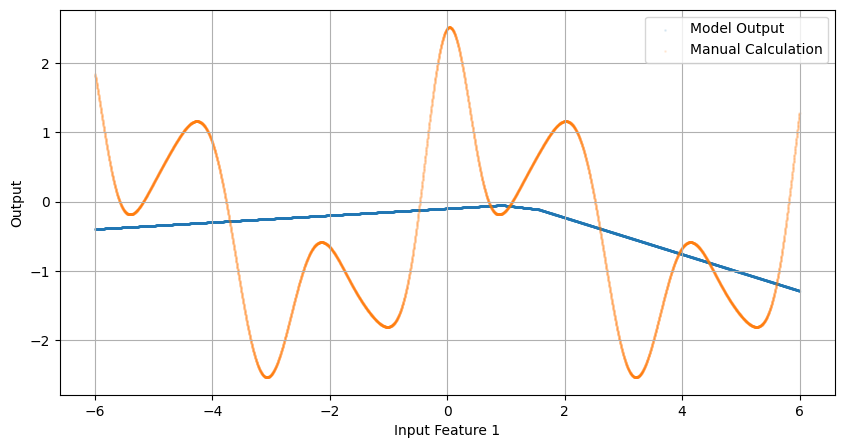

In [223]:
optimizer = optim.SGD(model.parameters(), lr=0.000001 * 10)
optimizer = optim.Adam(model.parameters(), lr=0.0000001 * 1000)
evaluate_model(model, custom_train_loader, criterion, optimizer)    

Epoch    1 | Train Loss:     1.5817 | Validation Loss:     1.4873
Epoch    2 | Train Loss:     1.5195 | Validation Loss:     1.4502
Epoch    3 | Train Loss:     1.4935 | Validation Loss:     1.4238
Epoch    4 | Train Loss:     1.4716 | Validation Loss:     1.4002
Epoch    5 | Train Loss:     1.4519 | Validation Loss:     1.3794
Epoch    6 | Train Loss:     1.4362 | Validation Loss:     1.3625
Epoch    7 | Train Loss:     1.4233 | Validation Loss:     1.3490
Epoch    8 | Train Loss:     1.4111 | Validation Loss:     1.3339
Epoch    9 | Train Loss:     1.3990 | Validation Loss:     1.3222
Epoch   10 | Train Loss:     1.3869 | Validation Loss:     1.3095
Epoch   11 | Train Loss:     1.3750 | Validation Loss:     1.2967
Epoch   12 | Train Loss:     1.3628 | Validation Loss:     1.2844
Epoch   13 | Train Loss:     1.3487 | Validation Loss:     1.2665
Epoch   14 | Train Loss:     1.3332 | Validation Loss:     1.2500
Epoch   15 | Train Loss:     1.3155 | Validation Loss:     1.2346
Epoch   16

KeyboardInterrupt: 

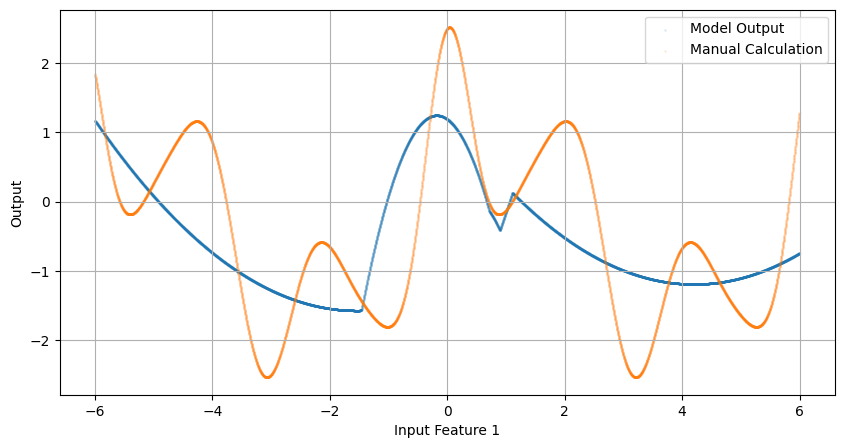

In [146]:
optimizer = optim.SGD(model.parameters(), lr=0.000001 * 10)
optimizer = optim.Adam(model.parameters(), lr=0.000001 * 1000)
evaluate_model(model, custom_train_loader, criterion, optimizer)    

In [380]:
import cv2
image_folder = 'training_images'

num_epochs = 154
frame = cv2.imread(f"{image_folder}/epoch_0001.png")
height, width, layers = frame.shape

video = cv2.VideoWriter('training_progress_154_linear_RELU_fixed.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))

for epoch in range(num_epochs):
    filename = f"{image_folder}/epoch_{epoch+1:04d}.png"
    video.write(cv2.imread(filename))

video.release()